**IMPORT** **LIBRARY**

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import pandas as pd
import warnings
import os
from scipy import stats
import statsmodels.api as smf
from matplotlib.ticker import FuncFormatter
from IPython.display import Image


**LOAD DATASET**

In [130]:
df = pd.read_csv("../data/Zara_Sales_Analysis.csv", sep=None, engine="python")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

## Check Missing Value

In [131]:
df.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

Terlihat bahwa dari seluruh data hanya ada 3 data yang kosong (null) yaitu pada kolom 1 pada 'name', dan 2 pada 'description'. Selanjutnya, kami menampilkan data yang kosong dalam kedua kolom tersebut.

In [132]:
df[(df['name'].isnull()) | (df['description'].isnull())]

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
60,151925,End-cap,Yes,Clothing,Yes,2179,Zara,https://www.zara.com/us/en/vintage-effect-leat...,320774184-800-97,VINTAGE EFFECT LEATHER BOMBER JACKET,NaN,299.0,USD,2024-02-19T08:50:43.543555,jackets,MAN
72,173576,End-cap,Yes,Clothing,No,1838,Zara,https://www.zara.com/us/en/-p04310461.html,336378923-700-2,NaN,NaN,129.0,USD,2024-02-19T08:50:54.476057,jackets,MAN


Setelah ditampilkan, telah terlihat bahwa Url pada kolom 'name' yang kosong, menampilkan bahwa page sudah tidak tersedia. Sehingga kami menghapus kolom name yang kosong.

In [133]:
# Mengisi data deskripsi yang kosong di baris ke-60
df.loc[60, 'description'] = 'VINTAGE EFFECT LEATHER BOMBER JACKET'
# Menghapus baris ke-72 yang datanya tidak bisa diperbaiki
df.drop(72, inplace=True)

Setelah data dibersihkan, beberapa kolom yang tidak digunakan dalam analisis atau dihilangkan.

In [134]:
df.drop(["Product Category","brand","url","sku","description","currency","scraped_at"], axis='columns', inplace=True)

Kemudian untuk mempermudah analisis, kolom diganti namanya dan semua huruf dijadikan *lowercase*.

In [135]:
df = df.rename(columns = {'Product ID': 'id', 'Product Position': 'position', 'Promotion': 'promotion', 'Seasonal': 'seasonal', 'Sales Volume': 'volume'})
print(df.head())

       id position promotion seasonal  volume                  name   price  \
0  185102    Aisle        No       No    2823   BASIC PUFFER JACKET   19.99   
1  188771    Aisle        No       No     654         TUXEDO JACKET  169.00   
2  180176  End-cap       Yes      Yes    2220  SLIM FIT SUIT JACKET  129.00   
3  112917    Aisle       Yes      Yes    1568   STRETCH SUIT JACKET  129.00   
4  192936  End-cap        No      Yes    2942   DOUBLE FACED JACKET  139.00   

     terms section  
0  jackets     MAN  
1  jackets     MAN  
2  jackets     MAN  
3  jackets     MAN  
4  jackets     MAN  


Memeriksa apakah terdapat inkonsistensi data dalam kolom-kolom kategorikal.

In [136]:
# Cek inkonsistensi kolom kategorikal
print("\nCek Konsistensi Kolom 'seasonal':")
print(df['seasonal'].value_counts())
print("\nCek Konsistensi Kolom 'promotion':")
print(df['promotion'].value_counts())
print("\nCek Konsistensi Kolom 'section':")
print(df['section'].value_counts())


Cek Konsistensi Kolom 'seasonal':
seasonal
Yes    128
No     123
Name: count, dtype: int64

Cek Konsistensi Kolom 'promotion':
promotion
No     132
Yes    119
Name: count, dtype: int64

Cek Konsistensi Kolom 'section':
section
MAN      217
WOMAN     34
Name: count, dtype: int64


Setelah itu, kolom yang masih tersedia dicek kembali apakah masih ada null/*missing value* atau data duplikat.

In [137]:
print("\nVerifikasi Data Setelah Cleaning")
print("-"*30)
print("Sisa nilai null:", df.isnull().sum().sum())
print("Jumlah duplikat:", df.duplicated().sum())


Verifikasi Data Setelah Cleaning
------------------------------
Sisa nilai null: 0
Jumlah duplikat: 0


Memastikan apakah ada *outliers* dari
kolom kuantitatif yang kita miliki yaitu '*price*' dan '*volume*' karena kedua kolom tersebut akan sangat sensitif dan digunakan untuk analisis lanjutan.

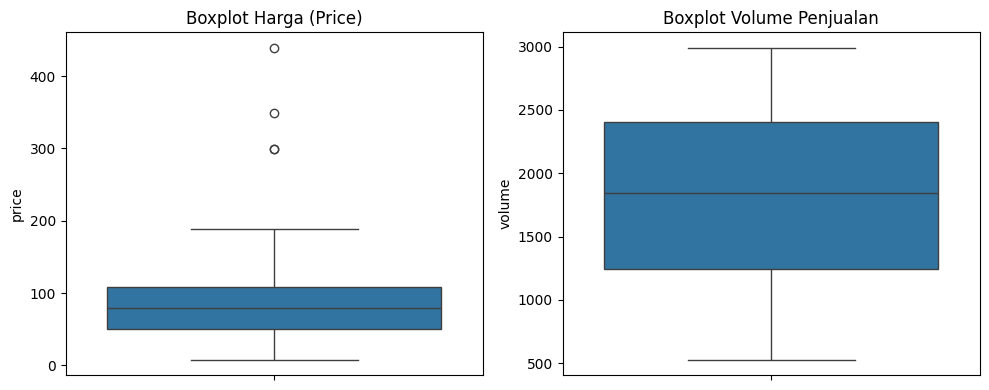

In [138]:
# Visualisasi untuk Deteksi Outlier
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['price'])
plt.title('Boxplot Harga (Price)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['volume'])
plt.title('Boxplot Volume Penjualan')
plt.tight_layout()
plt.show()

Memeriksa nilai dari *outlier* untuk mengetahui apakah data rill (valid) atau tidak. Setelah didapatkan informasinya, dilakukan evaluasi data *outlier*. Hasil inspeksi (evaluasi manual): *Outlier* ditemukan pada data produk jaket pria, nominal harga yang tinggi sangat masuk akal untuk kategori produk tersebut. Jadi, data tersebut akan tetap di-*keep*.

In [139]:
# Investigasi Nilai Outlier
percentile25 = df['price'].quantile(0.25)
percentile75 = df['price'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("\nData yang teridentifikasi sebagai Outlier Harga untuk dievaluasi:")
print(df[(df['price'] > upper_limit) | (df['price'] < lower_limit)])


Data yang teridentifikasi sebagai Outlier Harga untuk dievaluasi:
        id        position promotion seasonal  volume  \
13  151396  Front of Store       Yes      Yes     729   
22  161909           Aisle       Yes       No    1290   
38  114877           Aisle        No       No    1860   
60  151925         End-cap       Yes      Yes    2179   

                                    name  price    terms section  
13                CROPPED LEATHER JACKET  439.0  jackets     MAN  
22                        LEATHER JACKET  299.0  jackets     MAN  
38                          SUEDE JACKET  349.0  jackets     MAN  
60  VINTAGE EFFECT LEATHER BOMBER JACKET  299.0  jackets     MAN  


**DATASET OVERVIEW**

In [140]:
# Membuat kolom 'income' dan menampilkan ringkasan akhir
df['income'] = df['volume'] * df['price']
print("\n" + "="*50)
print("ANALISIS PENJUALAN ZARA (SETELAH DIBERSIHKAN)")
print("=" * 50)
print(f"Bentuk dataset akhir: {df.shape}")
print(f"Total produk unik: {df['id'].nunique()}")
print(f"Total income: ${df['income'].sum():,.2f}")
print("\n📊 Ringkasan Statistik:")
print(df.describe())


ANALISIS PENJUALAN ZARA (SETELAH DIBERSIHKAN)
Bentuk dataset akhir: (251, 10)
Total produk unik: 251
Total income: $38,751,374.48

📊 Ringkasan Statistik:
                  id       volume       price         income
count     251.000000   251.000000  251.000000     251.000000
mean   153290.003984  1823.645418   86.082231  154387.946135
std     26181.420512   699.097176   52.116910  107111.917554
min    110075.000000   529.000000    7.990000    4330.580000
25%    130809.500000  1241.000000   49.900000   77568.300000
50%    151438.000000  1841.000000   79.900000  129105.300000
75%    175755.500000  2400.500000  109.000000  199173.450000
max    199631.000000  2989.000000  439.000000  651521.000000


**EXPLORATORY DATA ANALYSIS**

In [141]:
df['income'] = df['volume'] * df['price']

print("\n" + "="*50)
print("ANALISIS PENJUALAN ZARA (SETELAH DIBERSIHKAN)")
print("="*50)

print(f"Bentuk dataset  : {df.shape}")
print(f"Produk unik     : {df['id'].nunique()}")
print(f"Total volume    : {df['volume'].sum():,.0f} unit")
print(f"Total income    : ${df['income'].sum():,.2f}")
print(f"Rata-rata harga : ${df['price'].mean():.2f}")
print(f"Avg income/prod : ${df['income'].mean():,.2f}")

# Promotion impact
promo = df.groupby('promotion')['income'].mean()
if 'Yes' in promo.index and 'No' in promo.index:
    impact = (promo['Yes'] - promo['No']) / promo['No'] * 100
    print(f"Promotion Impact: {impact:.1f}% lebih tinggi (Yes vs No)")

# Ringkasan statistik & missing values
print("\n📊 Statistik Numerik:")
print(df[['price', 'volume', 'income']].describe())

print("\n🔍 Missing Values:")
print(df.isnull().sum())


ANALISIS PENJUALAN ZARA (SETELAH DIBERSIHKAN)
Bentuk dataset  : (251, 10)
Produk unik     : 251
Total volume    : 457,735 unit
Total income    : $38,751,374.48
Rata-rata harga : $86.08
Avg income/prod : $154,387.95
Promotion Impact: 15.4% lebih tinggi (Yes vs No)

📊 Statistik Numerik:
            price       volume         income
count  251.000000   251.000000     251.000000
mean    86.082231  1823.645418  154387.946135
std     52.116910   699.097176  107111.917554
min      7.990000   529.000000    4330.580000
25%     49.900000  1241.000000   77568.300000
50%     79.900000  1841.000000  129105.300000
75%    109.000000  2400.500000  199173.450000
max    439.000000  2989.000000  651521.000000

🔍 Missing Values:
id           0
position     0
promotion    0
seasonal     0
volume       0
name         0
price        0
terms        0
section      0
income       0
dtype: int64


In [142]:
# Ringkasan KPI

total_income = df["income"].sum()
total_volume = df["volume"].sum()
avg_price    = df["price"].mean()

by_promo = df.groupby("promotion", as_index=False).agg(
    income=("income","sum"),
    volume=("volume","sum"),
    avg_price=("price","mean")
)

print(f"💰 Total Income  : ${total_income:,.2f}")
print(f"📦 Total Volume  : {int(total_volume):,} units")
print(f"🏷️  Avg Price    : ${avg_price:,.2f}")
print("\nRingkasan per Promotion:\n", by_promo)

💰 Total Income  : $38,751,374.48
📦 Total Volume  : 457,735 units
🏷️  Avg Price    : $86.08

Ringkasan per Promotion:
   promotion       income  volume  avg_price
0        No  18994089.58  240312  80.651515
1       Yes  19757284.90  217423  92.106218


**VISUALISASI**

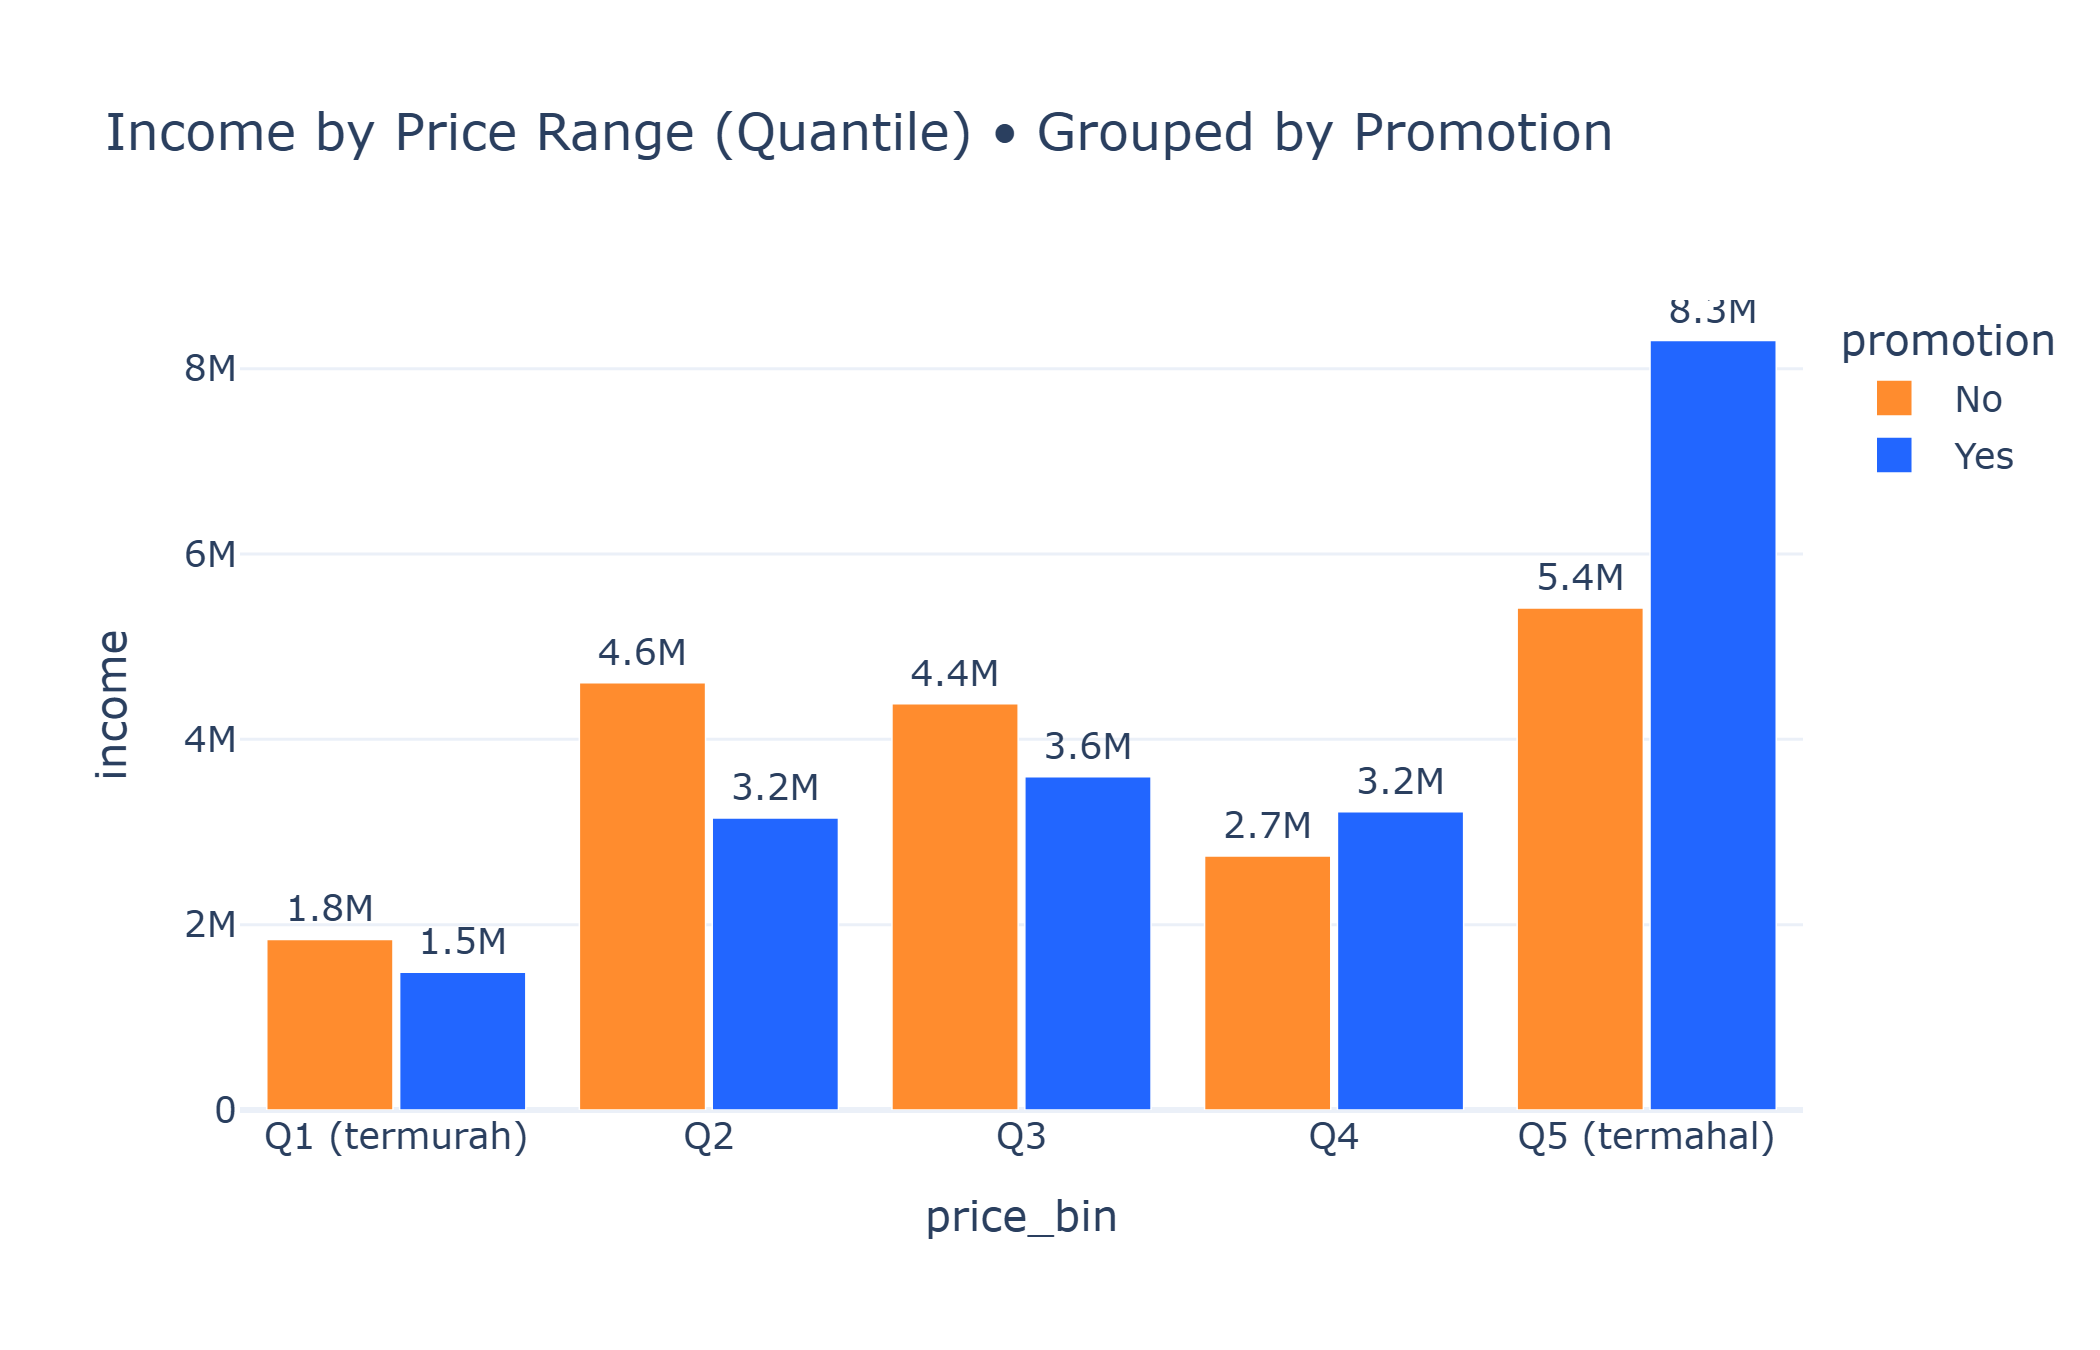

In [143]:
import os

# pastikan folder images ada
os.makedirs("images", exist_ok=True)

# bikin quantile bins harga
df["price_bin"] = pd.qcut(
    df["price"],
    q=5,
    labels=["Q1 (termurah)", "Q2", "Q3", "Q4", "Q5 (termahal)"],
    duplicates="drop"
)

# agregasi (tambahkan observed=True)
agg_bins = df.groupby(
    ["price_bin", "promotion"],
    observed=True,         # ← hilangkan FutureWarning
    as_index=False
).agg(
    income=("income", "sum"),
    volume=("volume", "sum"),
    avg_price=("price", "mean")
)

# bar chart
fig_bins = px.bar(
    agg_bins,
    x="price_bin",
    y="income",
    color="promotion",
    barmode="group",
    color_discrete_map={"Yes": "#2266FF", "No": "#FF8C2E"},
    text="income",
    hover_data={
        "avg_price": ":.2f",
        "volume": ":,",
        "income": ":.3s"
    },
    title="Income by Price Range (Quantile) • Grouped by Promotion"
)

fig_bins.update_traces(
    texttemplate="%{text:.2s}",
    textposition="outside"
)

fig_bins.update_layout(
    template="plotly_white",
    bargap=0.15,
    bargroupgap=0.05,
    width=700,
    height=450
)

fig_bins.show()

# export PNG
fig_bins.write_image("images/income_price_bins.png", scale=3)
Image(filename="images/income_price_bins.png")

**Visualisasi dengan Scatterplot**

In [144]:
# Menerapkan Trace pada kolom kategorikal 'Promotion' dan parameter 'color' biru dan oranye dengan dictionary marker
def make_trace(promo, dff, color):
    d = dff[dff['promotion'] == promo]
    return go.Scatter(
        x=d['price'],
        y=d['volume'],
        mode='markers',
        name=f"Promotion: {promo}",
        marker=dict(size=10, opacity=0.7, color=color),
        text=[f"Product: {n}<br>Price: {p}$<br>Volume: {v}<br>Promotion: {promo}<br>Income: {inc}"
              for n, p, v, inc in zip(d['name'], d['price'], d['volume'], d['income'])],
        hoverinfo='text',
        visible=True
    )

# Membuat konfigurasi data tanpa filter
fig = go.Figure(data=[make_trace('Yes', df, 'blue'), make_trace('No', df, 'orange')])

# Filter Dropdown untuk kolom 'Section'
sections = df['section'].unique()
dropdown_section = [
    dict(
        label=sec,
        method="update",
        args=[
            {
                "x": [
                    df.query(f"section=='{sec}' and promotion=='Yes'")['price'],
                    df.query(f"section=='{sec}' and promotion=='No'")['price']
                ],
                "y": [
                    df.query(f"section=='{sec}' and promotion=='Yes'")['volume'],
                    df.query(f"section=='{sec}' and promotion=='No'")['volume']
                ],
                "text": [
                    df.query(f"section=='{sec}' and promotion=='Yes'")[['name','price','volume','income']].astype(str).agg('<br>'.join, axis=1),
                    df.query(f"section=='{sec}' and promotion=='No'")[['name','price','volume','income']].astype(str).agg('<br>'.join, axis=1)
                ]
            },
            {"title": f"Scatter: Section = {sec}"}
        ]
    )
    for sec in sections
]

# Tambahkan opsi "Show All" di dropdown section
dropdown_section.insert(0, dict(
    label="Show All",
    method="update",
    args=[
        {
            "x": [
                df[df['promotion'] == 'Yes']['price'],
                df[df['promotion'] == 'No']['price']
            ],
            "y": [
                df[df['promotion'] == 'Yes']['volume'],
                df[df['promotion'] == 'No']['volume']
            ],
            "text": [
                df[df['promotion'] == 'Yes'][['name','price','volume','income']].astype(str).agg('<br>'.join, axis=1),
                df[df['promotion'] == 'No'][['name','price','volume','income']].astype(str).agg('<br>'.join, axis=1)
            ]
        },
        {"title": "Scatter: Section = All"}
    ]
))

# Filter Dropdown untuk kolom 'Terms'
terms = df['terms'].unique()
dropdown_terms = [
    dict(
        label=t,
        method="update",
        args=[
            {
                "x": [
                    df.query(f"terms=='{t}' and promotion=='Yes'")['price'],
                    df.query(f"terms=='{t}' and promotion=='No'")['price']
                ],
                "y": [
                    df.query(f"terms=='{t}' and promotion=='Yes'")['volume'],
                    df.query(f"terms=='{t}' and promotion=='No'")['volume']
                ],
                "text": [
                    df.query(f"terms=='{t}' and promotion=='Yes'")[['name','price','volume','income']].astype(str).agg('<br>'.join, axis=1),
                    df.query(f"terms=='{t}' and promotion=='No'")[['name','price','volume','income']].astype(str).agg('<br>'.join, axis=1)
                ]
            },
            {"title": f"Scatter: Terms = {t}"}
        ]
    )
    for t in terms
]

# Tambahkan opsi "Show All" di dropdown terms
dropdown_terms.insert(0, dict(
    label="Show All",
    method="update",
    args=[
        {
            "x": [
                df[df['promotion'] == 'Yes']['price'],
                df[df['promotion'] == 'No']['price']
            ],
            "y": [
                df[df['promotion'] == 'Yes']['volume'],
                df[df['promotion'] == 'No']['volume']
            ],
            "text": [
                df[df['promotion'] == 'Yes'][['name','price','volume','income']].astype(str).agg('<br>'.join, axis=1),
                df[df['promotion'] == 'No'][['name','price','volume','income']].astype(str).agg('<br>'.join, axis=1)
            ]
        },
        {"title": "Scatter: Terms = All"}
    ]
))

# Filter Dropdown 'Promotion'
dropdown_promo = [
    dict(
        label="Promotion: Yes",
        method="update",
        args=[{"visible": [True, False]}, {"title": "Promotion: Yes"}]
    ),
    dict(
        label="Promotion: No",
        method="update",
        args=[{"visible": [False, True]}, {"title": "Promotion: No"}]
    ),
    dict(
        label="Show Both",
        method="update",
        args=[{"visible": [True, True]}, {"title": "Promotion: Both"}]
    )
]

# Update layout
fig.update_layout(
    title="Zara Sales: Price vs Volume",
    title_x=0.5,
    title_y=0.95,

    updatemenus=[
        dict(buttons=dropdown_section, direction="down", x=0.00, y=1.15, xanchor='left', yanchor='top', showactive=True, bgcolor="white"),
        dict(buttons=dropdown_terms, direction="down", x=0.25, y=1.15, xanchor='left', yanchor='top', showactive=True, bgcolor="white"),
        dict(buttons=dropdown_promo, direction="down", x=0.50, y=1.15, xanchor='left', yanchor='top', showactive=True, bgcolor="white")
    ],

    # Mengatur sumbu X agar menampilkan format USD
    xaxis=dict(
        title="Price",
        tickformat='$,.0f'
    ),
    yaxis_title="Volume",

    margin=dict(t=150),
    dragmode="select",
    height=800
)

fig.show()


**Visualisasi dengan Barchart: Perbandingan dengan 1 Alternatif Visual Encoding**

In [145]:
# Menerapkan Trace pada kolom kategorikal 'Promotion' dan parameter 'color' biru dan oranye dengan dictionary marker
def make_trace(promo, dff, color):
    d = dff[dff['promotion'] == promo]
    return go.Bar(
        x=d['name'],
        y=d['volume'],
        name=f"Promotion: {promo}",
        marker_color=color,
        text=[f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: {promo}<br>Income: ${inc:,.2f}"
              for n, p, v, inc in zip(d['name'], d['price'], d['volume'], d['income'])],
        hoverinfo='text'
    )

# Membuat konfigurasi data tanpa filter
fig = go.Figure(data=[make_trace('No', df, 'orange'), make_trace('Yes', df, 'blue')])

# Filter Dropdown untuk kolom 'Section'
sections = df['section'].unique()
dropdown_section = [
    dict(
        label="Show All",
        method="update",
        args=[
            {
                "x": [
                    df[df['promotion'] == 'No']['name'],
                    df[df['promotion'] == 'Yes']['name']
                ],
                "y": [
                    df[df['promotion'] == 'No']['volume'],
                    df[df['promotion'] == 'Yes']['volume']
                ],
                "text": [
                    [f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: No<br>Income: ${inc:,.2f}"
                     for n, p, v, inc in df[df['promotion'] == 'No'][['name','price','volume','income']].itertuples(index=False)],
                    [f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: Yes<br>Income: ${inc:,.2f}"
                     for n, p, v, inc in df[df['promotion'] == 'Yes'][['name','price','volume','income']].itertuples(index=False)]
                ]
            },
            {"title": "Zara Sales (Bar Chart): All Sections"}
        ]
    )
] + [
    dict(
        label=sec,
        method="update",
        args=[
            {
                "x": [
                    df.query(f"section=='{sec}' and promotion=='No'")['name'],
                    df.query(f"section=='{sec}' and promotion=='Yes'")['name']
                ],
                "y": [
                    df.query(f"section=='{sec}' and promotion=='No'")['volume'],
                    df.query(f"section=='{sec}' and promotion=='Yes'")['volume']
                ],
                "text": [
                    [f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: No<br>Income: ${inc:,.2f}"
                     for n, p, v, inc in df.query(f"section=='{sec}' and promotion=='No'")[['name','price','volume','income']].itertuples(index=False)],
                    [f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: Yes<br>Income: ${inc:,.2f}"
                     for n, p, v, inc in df.query(f"section=='{sec}' and promotion=='Yes'")[['name','price','volume','income']].itertuples(index=False)]
                ]
            },
            {"title": f"Zara Sales (Bar Chart): {sec}"}
        ]
    )
    for sec in sections
]

# Filter Dropdown untuk kolom 'Terms'
terms = df['terms'].unique()
dropdown_terms = [
    dict(
        label="Show All",
        method="update",
        args=[
            {
                "x": [
                    df[df['promotion'] == 'No']['name'],
                    df[df['promotion'] == 'Yes']['name']
                ],
                "y": [
                    df[df['promotion'] == 'No']['volume'],
                    df[df['promotion'] == 'Yes']['volume']
                ],
                "text": [
                    [f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: No<br>Income: ${inc:,.2f}"
                     for n, p, v, inc in df[df['promotion'] == 'No'][['name','price','volume','income']].itertuples(index=False)],
                    [f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: Yes<br>Income: ${inc:,.2f}"
                     for n, p, v, inc in df[df['promotion'] == 'Yes'][['name','price','volume','income']].itertuples(index=False)]
                ]
            },
            {"title": "Zara Sales (Bar Chart): All Terms"}
        ]
    )
] + [
    dict(
        label=t,
        method="update",
        args=[
            {
                "x": [
                    df.query(f"terms=='{t}' and promotion=='No'")['name'],
                    df.query(f"terms=='{t}' and promotion=='Yes'")['name']
                ],
                "y": [
                    df.query(f"terms=='{t}' and promotion=='No'")['volume'],
                    df.query(f"terms=='{t}' and promotion=='Yes'")['volume']
                ],
                "text": [
                     [f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: No<br>Income: ${inc:,.2f}"
                     for n, p, v, inc in df.query(f"terms=='{t}' and promotion=='No'")[['name','price','volume','income']].itertuples(index=False)],
                    [f"<b>{n}</b><br>Price: ${p:,.2f}<br>Volume: {v:,}<br>Promotion: Yes<br>Income: ${inc:,.2f}"
                     for n, p, v, inc in df.query(f"terms=='{t}' and promotion=='Yes'")[['name','price','volume','income']].itertuples(index=False)]
                ]
            },
            {"title": f"Zara Sales (Bar Chart): {t}"}
        ]
    )
    for t in terms
]

# Filter Dropdown untuk kolom 'Promotion'
dropdown_promo = [
    dict(
        label="Promotion: No",
        method="update",
        args=[{"visible": [True, False]}, {"title": "Sales without Promotion"}]
    ),
    dict(
        label="Promotion: Yes",
        method="update",
        args=[{"visible": [False, True]}, {"title": "Sales with Promotion"}]
    ),
    dict(
        label="Show Both",
        method="update",
        args=[{"visible": [True, True]}, {"title": "Sales: All Products"}]
    )
]

fig.update_layout(
    barmode="group",
    title="Zara Sales: Price vs Volume (Barchart)",
    title_x=0.5,
    title_y=0.95,

    updatemenus=[
        dict(buttons=dropdown_section, direction="down", x=0.00, y=1.15, xanchor='left', yanchor='top', bgcolor="white"),
        dict(buttons=dropdown_terms, direction="down", x=0.25, y=1.15, xanchor='left', yanchor='top', bgcolor="white"),
        dict(buttons=dropdown_promo, direction="down", x=0.50, y=1.15, xanchor='left', yanchor='top', bgcolor="white")
    ],

    yaxis_title="Volume (Units Sold)",
    yaxis=dict(tickformat=',.0f'),

    xaxis=dict(
        title="Product Name",
        tickangle=-45,
        tickfont=dict(size=10)
    ),

    legend_title_text='Promotion Status',
    height=700,

    margin=dict(t=150, b=150)
)

fig.show()